# Defense Quality: A New Way of Measuring Defensive Impact in the NHL

One of the hardest things to measure in the NHL is the impact good defense has on a game. There aren't many counting stats that can directly point to good defense, rather, good defense often shows up as a lack of production from an offensive player. There's been many attempts to create solid defensive stats, and many excellent ones as well. I want to pose a new stat called Defense Quality, that measures a player's impact compared to the rest of the league. Defense Quality addresses gaps in current defense metrics by focusing on the amount of scoring chances a player gives up rather than goals, and rewarding efficiency rather than single game performance.

## Current Stats
Defense Quality is not the first stat that measures defensive impact, and not even the first one focused on scoring chances. Corsi and Fenwick do a great job of showing a player's impact, and xG models are incredible at showing tangible results. [Dom Luszczyszyn](https://www.nytimes.com/athletic/author/dom-luszczyszyn/) from The Athletic has a great [Defensive Rating](https://www.nytimes.com/athletic/4396412/2023/04/12/nhl-advanced-stats-offensive-defensive-rating/) metric that is based largely on xG and per game stats. It's measured in goals, and can be translated into a WAR metric. It is an excellent stat for measuring the results of a game, and this is where Defense Quality differs from Defensive Rating.

There are three main gaps in Defense Rating that Defense Quality aims to fill. 

### 1. Defensive Rating does not take into account how a goal was scored.
While all goals are not necessarily treated equal as it uses G - xG, it still only focuses on the outcome of a play. Defense Quality aims to fix this by focusing on the quality of scoring chances opposing teams have, while the player is on the ice.

### 2. Defensive Rating focuses on per game statistics rather than efficiency.
Per game statistics are good when focusing on positive stats such as, hits, blocks, etc. However, a top pair defenseman is going to be playing more minutes against better opposition, than a bottom pair defenseman, which will inevitably inflate their negative stats such as goals, chances, etc. This makes it difficult to correctly scale a player's "per 60" impact. However, I've found that incorporating the player's ice time and situation has pretty successfully addressed these concerns.

### 3. Defensive Rating neglects a goalie's impact on goals.
Using xG is great for analyzing the results of a game and a player's impact. However, it can unfairly punish good defense because of poor goaltending. Defense Quality does the opposite, and ignores the result in favor of focusing on the quality of the scoring chance itself.

Together, Defensive Rating and Defense Quality give a much more nuanced understanding of a player's impact on defense. I want to emphasize that Defense Quality is not meant to replace Defensive Rating. Fundamentally, they measure different things. Hockey games are won by scoring goals and not generating good opportunities, so it's important to analyze the results of a game like Defensive Rating does. Defense Quality is meant to address gaps in the information of Defensive Rating, and provide a further in depth analysis of the player's impact on defense. Since we want numbers accurate to today, we will be basing this metric on data from the 2024-25 season.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/mattanikiej/nhl-stats/data/2024-25/skaters.csv")

data.head()

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
0,8478047,2024,Michael Bunting,NSH,L,other,76,2237.0,37.0,26.19,...,7.28,10.09,72.0,87.0,0.00,0.00,0.0,0.0,0.0,0.0
1,8478047,2024,Michael Bunting,NSH,L,all,76,70819.0,1474.0,43.70,...,161.54,187.75,3221.0,3522.0,0.00,0.00,0.0,0.0,0.0,0.0
2,8478047,2024,Michael Bunting,NSH,L,5on5,76,59813.0,1294.0,43.70,...,112.73,122.08,2661.0,2707.0,0.71,1.71,19.0,43.0,16.0,31.0
3,8478047,2024,Michael Bunting,NSH,L,4on5,76,6.0,2.0,2.58,...,0.20,0.17,4.0,11.0,0.00,0.00,0.0,0.0,0.0,0.0
4,8478047,2024,Michael Bunting,NSH,L,5on4,76,8763.0,141.0,36.88,...,23.81,2.60,311.0,54.0,0.00,0.01,0.0,1.0,0.0,1.0


## Defense Quality Formula

So what is Defense Quality? It is a weighted average of a player's defensive stats. There are 16 total and they're separated into 6 groups. Each groups total weight, is the sum of the individual statistics in that group.

### 1. Ice Time (5%)
* Ice Time - 5%
 
This is used to weight a player's ice time, so as not to over reward great shifts in small sample sizes.
 
### 2. Shot Suppression (27%)
* High Danger Shots Against - 15%
* Medium Danger Shots Against - 10%
* Low Danger Shots Against - 1%
* Shots Against - 1%

This has the highest weight and importance in Defense Quality. We want to measure the quality of offense the opposition has, and therefore Defense Quality is very heavily focused on suppressing scoring chances. Scoring chances are much more tangible than xG, and much easier to understand. Although this doesn't address the biggest issue with the blackbox of xG sometimes (expected by whom?) since there are a million and one ways to define the danger of scoring chances, it still provides good information on preventing offense. Essentially, it's a more in depth Corsi Against.

For those wondering, this dataset used [MoneyPuck's formula](https://moneypuck.com/glossary.htm) since it's very easy to understand: High Danger is a shot with >= 20% chance of a goal, 20% > Medium >= 8%, 8% > Low. [Natural Stat Trick has a danger calculation as well](https://www.naturalstattrick.com/glossary.php?teams).
 
### 3. Physical Defense (15%)
* Blocked Shots - 15%

Regardless of the quality of the chance, a blocked shot is potentially as good a save. Anytime a defenseman can stop a puck from getting to the net is good defense and must be rewarded.
 
### 4. Puck Management (20%)
* Takeaways - 5%
* Giveaways - 5%
* Defensive Zone Giveaways - 10%

A giveaway is as disastrous as a takeaway is good, which is why they're weighted the same. A giveaway in the defensive zone is a blunder that can cost games. 10% may seem low for that reason, but keep in mind it's getting punished twice (Giveaway + Defensive Zone Giveaway), and potentially a third time if it leads to a scoring chance.
 
### 5. Shift Quality (17%)
* Defensive Zone Starts - 5%
* Defensive Zone Shift Ends - 5%
* Offensive Zone Shift Ends - 5%
* Neutral Zone Shift Ends - 1%
* Fly Shift Ends - 1%

Being able to break the puck out is good defense. That's why starting in your defensive zone, and ending in the offensive zone gets rewarded. Understanding where a shift starts and ends also lets us imply some things that can't be measured. Starting in your defensive zone often implies good defense, as the coach trusts the player's defensive impact. Ending in the offensive zone, implies a good and efficient break out, as the player wasn't gassed yet and didn't come to the bench. Ending in the neutral zone or on the fly is rewarded, but might have taken a while so it's not as rewarding as a quick transition from defense to offense. Is this a perfect way of measuring a breakout? No, but the NHL Edge data does not have breakout statistics and impact, and I've found this is a good work around that fits in 90% of situations.
  
### 6. Penalty Differential (16%)
* Penalties Taken - 15%
* Penalties Drawn - 1%

Taking a penalty is often due to lazy defense or getting beat. However it happened, a penalty kill puts the player's team in an extremely dangerous situation is treated as such. Conversly, drawing penalties usually happens during good offense, and it unfairly skewed towards offensive players. For example, when weighted equally, Jack Hughes was a top 5 defensive forward. It's still rewarded, but at a much lower weight than taking a penalty is penalized.


In [3]:
# All stats needed for Defensive Rating calculation
defensive_stats = [
    # Player Info
    'name',
    'team',
    'position',
    'games_played',
    
    # Ice time responsibility
    'icetime',

    # Shot Suppression
    'OnIce_A_highDangerShots',
    'OnIce_A_mediumDangerShots',
    'OnIce_A_lowDangerShots',
    'OnIce_A_shotAttempts',
    
    # Physical Defense
    'shotsBlockedByPlayer',
    
    # Puck Management
    'I_F_takeaways',
    'I_F_giveaways',
    'I_F_dZoneGiveaways',
    
    # Shift Quality
    'I_F_dZoneShiftStarts',
    'I_F_dZoneShiftEnds',
    'I_F_oZoneShiftEnds',
    'I_F_neutralZoneShiftEnds',
    'I_F_flyShiftEnds',
    
    # Penalty Differential
    'penalties',
    'penaltiesDrawn',
    
]

print(f"Total stats used: {len(defensive_stats) - 4}")


Total stats used: 16


In [4]:
data_5on5 = data[data['situation'] == '5on5']

data_5on5.head()

,playerId,season,name,team,position,situation,games_played,icetime,shifts,gameScore,...,OffIce_F_xGoals,OffIce_A_xGoals,OffIce_F_shotAttempts,OffIce_A_shotAttempts,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts
2,8478047,2024,Michael Bunting,NSH,L,5on5,76,59813.0,1294.0,43.70,...,112.73,122.08,2661.0,2707.0,0.71,1.71,19.0,43.0,16.0,31.0
7,8480950,2024,Ilya Lyubushkin,DAL,D,5on5,80,70786.0,1535.0,10.38,...,121.70,119.55,2715.0,2625.0,8.56,0.32,155.0,9.0,123.0,6.0
12,8477369,2024,Carson Soucy,NYR,D,5on5,75,69895.0,1609.0,8.07,...,95.12,95.00,2385.0,2269.0,5.71,1.21,107.0,19.0,75.0,15.0
17,8481518,2024,Nolan Foote,NJD,L,5on5,7,4075.0,100.0,1.92,...,11.78,9.15,283.0,217.0,0.09,0.02,4.0,2.0,3.0,1.0
22,8477964,2024,Ivan Barbashev,VGK,C,5on5,70,64523.0,1217.0,49.58,...,108.42,103.12,2432.0,2368.0,0.90,0.33,23.0,21.0,17.0,13.0


In [5]:
defense_5on5 = data_5on5[defensive_stats]

defense_5on5.head()

,name,team,position,games_played,icetime,OnIce_A_highDangerShots,OnIce_A_mediumDangerShots,OnIce_A_lowDangerShots,OnIce_A_shotAttempts,shotsBlockedByPlayer,I_F_takeaways,I_F_giveaways,I_F_dZoneGiveaways,I_F_dZoneShiftStarts,I_F_dZoneShiftEnds,I_F_oZoneShiftEnds,I_F_neutralZoneShiftEnds,I_F_flyShiftEnds,penalties,penaltiesDrawn
2,Michael Bunting,NSH,L,76,59813.0,47.0,127.0,481.0,923.0,17.0,11.0,51.0,11.0,79.0,191.0,201.0,166.0,736.0,26.0,25.0
7,Ilya Lyubushkin,DAL,D,80,70786.0,49.0,165.0,637.0,1196.0,109.0,17.0,103.0,67.0,208.0,193.0,202.0,168.0,972.0,15.0,8.0
12,Carson Soucy,NYR,D,75,69895.0,48.0,137.0,643.0,1154.0,88.0,17.0,71.0,47.0,172.0,198.0,178.0,175.0,1058.0,18.0,4.0
17,Nolan Foote,NJD,L,7,4075.0,1.0,8.0,26.0,49.0,1.0,1.0,2.0,0.0,8.0,13.0,15.0,10.0,62.0,0.0,0.0
22,Ivan Barbashev,VGK,C,70,64523.0,52.0,127.0,607.0,1091.0,30.0,18.0,73.0,23.0,129.0,176.0,202.0,194.0,645.0,4.0,12.0


In [6]:
defense_5on5.describe()

,games_played,icetime,OnIce_A_highDangerShots,OnIce_A_mediumDangerShots,OnIce_A_lowDangerShots,OnIce_A_shotAttempts,shotsBlockedByPlayer,I_F_takeaways,I_F_giveaways,I_F_dZoneGiveaways,I_F_dZoneShiftStarts,I_F_dZoneShiftEnds,I_F_oZoneShiftEnds,I_F_neutralZoneShiftEnds,I_F_flyShiftEnds,penalties,penaltiesDrawn
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,51.330435,42484.634783,29.608696,85.815217,369.086957,682.005435,36.035870,11.857609,37.316304,17.343478,97.647826,122.763043,123.059783,121.967391,537.643478,8.369565,7.692391
std,29.600450,27703.787686,20.653026,57.658355,243.716931,448.245700,32.277999,9.683363,27.815476,17.069322,71.697465,77.491397,78.321758,83.790031,347.767046,7.315994,6.781844
min,1.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,13766.500000,9.000000,28.000000,119.000000,223.750000,10.000000,3.000000,10.000000,4.000000,27.000000,45.000000,45.000000,36.500000,185.750000,2.000000,2.000000
50%,63.000000,48113.000000,31.000000,91.000000,411.000000,754.000000,29.000000,11.000000,37.000000,13.000000,98.500000,136.000000,141.000000,131.500000,618.500000,7.000000,7.000000
75%,78.000000,65117.000000,46.000000,132.000000,563.250000,1038.500000,50.000000,18.000000,57.000000,23.000000,151.000000,186.000000,185.000000,191.000000,799.500000,12.000000,12.000000
max,85.000000,104612.000000,94.000000,228.000000,987.000000,1779.000000,179.000000,50.000000,140.000000,104.000000,314.000000,311.000000,302.000000,318.000000,1471.000000,45.000000,35.000000


So how are these stats being compared? There's a few things we have to do first. In order to reduce the impact of small sample sizes, we need to stablish a metric that will make a player qualify for Defense Quality. Think quality starts in baseball, or minimum games for leaderboards. Defense Quality requires a player to average 10 minutes a game, and have played in at least half of the games that season. This ensures we are eliminating players that had great shifts in small roles, which will heavily skew the per 60 stats.

Also, the defensive role for forwards and defenseman is much different, so each stat is normalized by position, and will also be split accordingly later. For this exercise, all forwards will be treated as a forward, regardless of actual position. I understand there are different responsibilities, but we'll see later how forwards might need to have some different weights to their formulation anyway. 

To calculate Defense Quality we will take an approach very similar to my [first blog about finding the NHL's lucky charm](https://medium.com/hockey-harmony/the-nhls-lucky-charm-ccbb5df786d9) and build a composite z-score. This will bring everything together onto the same scale, and allow us to compare to the average player much better. I wanted to use this blog to highlight various statistical techniques and how they can be applied to hockey analytics, but I believe a composite z-score is most appropriate for this case.

In [7]:
defense_5on5.loc[:, ['icetime_minutes']] = defense_5on5['icetime'] / 60

defense_10_minutes = defense_5on5[
    (defense_5on5['icetime_minutes'] / defense_5on5['games_played'] >= 10)
    & (defense_5on5['games_played'] >= 41)
]

defense_10_minutes.describe()

,games_played,icetime,OnIce_A_highDangerShots,OnIce_A_mediumDangerShots,OnIce_A_lowDangerShots,OnIce_A_shotAttempts,shotsBlockedByPlayer,I_F_takeaways,I_F_giveaways,I_F_dZoneGiveaways,I_F_dZoneShiftStarts,I_F_dZoneShiftEnds,I_F_oZoneShiftEnds,I_F_neutralZoneShiftEnds,I_F_flyShiftEnds,penalties,penaltiesDrawn,icetime_minutes
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,72.032143,61838.539286,43.216071,124.976786,536.716071,991.246429,52.085714,17.625000,54.703571,25.301786,142.600000,175.857143,175.992857,179.337500,775.741071,11.814286,11.055357,1030.642321
std,10.909895,14681.047776,13.481642,34.357759,138.546995,250.912161,30.962436,7.817147,20.528735,17.048914,50.451386,42.152517,42.772686,49.356996,192.651991,6.755464,6.230700,244.684130
min,41.000000,26425.000000,12.000000,42.000000,203.000000,382.000000,8.000000,3.000000,15.000000,3.000000,23.000000,69.000000,65.000000,57.000000,290.000000,0.000000,0.000000,440.416667
25%,67.000000,52770.250000,34.000000,101.750000,446.000000,819.000000,29.000000,12.000000,39.000000,12.000000,107.000000,147.000000,146.000000,142.750000,646.750000,7.000000,6.750000,879.504167
50%,76.000000,61491.000000,43.000000,124.000000,533.000000,985.000000,42.500000,17.000000,52.000000,19.000000,140.500000,176.500000,178.000000,180.000000,768.000000,10.000000,10.000000,1024.850000
75%,81.000000,70570.500000,52.000000,147.000000,626.250000,1158.000000,69.000000,22.000000,67.000000,36.000000,172.250000,205.000000,205.000000,215.000000,889.500000,15.250000,15.000000,1176.175000
max,85.000000,104612.000000,94.000000,228.000000,987.000000,1779.000000,179.000000,50.000000,140.000000,104.000000,314.000000,311.000000,302.000000,318.000000,1471.000000,45.000000,35.000000,1743.533333


In [8]:
# Normalize all defensive stats by ice time (per 60 minutes)
defense_normalized = defense_10_minutes.copy()

# Convert ice time to hours for per-60 calculations
icetime_hours = defense_normalized['icetime'] / 3600

# Calculate ice time per game (will be normalized by position)
defense_normalized['icetime_per_game'] = defense_normalized['icetime'] / defense_normalized['games_played']

# Normalize all stats
stats_to_normalize = [stat for stat in defensive_stats if stat not in ['icetime', 'icetime_per_game', 'games_played', 'name', 'team', 'position']]

for stat in stats_to_normalize:
    defense_normalized[f'{stat}_per60'] = defense_normalized[stat] / icetime_hours

# Standardize the per60 stats BY POSITION (position-specific z-scores)
per60_stats = [f'{stat}_per60' for stat in stats_to_normalize] + ['icetime_per_game'] + ['name', 'team', 'position']

# Transform C, L, R positions to F (Forward)
defense_normalized['position'] = defense_normalized['position'].replace({'C': 'F', 'L': 'F', 'R': 'F'})

for stat in per60_stats:
    if stat not in ['name', 'team', 'position']:
        # Calculate position-specific mean and std, then standardize within position
        defense_normalized[stat] = defense_normalized.groupby('position')[stat].transform(
            lambda x: (x - x.mean()) / x.std()
        )

# Show the normalized data
defense_normalized.head()


,name,team,position,games_played,icetime,OnIce_A_highDangerShots,OnIce_A_mediumDangerShots,OnIce_A_lowDangerShots,OnIce_A_shotAttempts,shotsBlockedByPlayer,...,I_F_takeaways_per60,I_F_giveaways_per60,I_F_dZoneGiveaways_per60,I_F_dZoneShiftStarts_per60,I_F_dZoneShiftEnds_per60,I_F_oZoneShiftEnds_per60,I_F_neutralZoneShiftEnds_per60,I_F_flyShiftEnds_per60,penalties_per60,penaltiesDrawn_per60
2,Michael Bunting,NSH,F,76,59813.0,47.0,127.0,481.0,923.0,17.0,...,-1.021651,0.177342,-0.889666,-1.388037,0.477589,0.411046,-0.691069,-0.119593,2.001072,1.887581
7,Ilya Lyubushkin,DAL,D,80,70786.0,49.0,165.0,637.0,1196.0,109.0,...,-0.466159,2.662645,2.187086,1.514781,-0.022019,0.425182,-0.953497,0.612857,0.235820,-0.016663
12,Carson Soucy,NYR,D,75,69895.0,48.0,137.0,643.0,1154.0,88.0,...,-0.434646,0.261487,0.277254,0.522278,0.185438,-0.079843,-0.510809,1.573115,0.682549,-0.901796
22,Ivan Barbashev,VGK,F,70,64523.0,52.0,127.0,607.0,1091.0,30.0,...,-0.003845,1.646416,1.226863,-0.490188,-0.524670,0.040595,-0.058717,-1.842489,-1.174090,-0.354278
27,Egor Zamula,PHI,D,63,56910.0,28.0,102.0,443.0,863.0,82.0,...,-0.586896,-0.392575,-0.122937,-0.940028,-0.096327,0.182298,0.653050,0.727374,-1.322950,-1.252205


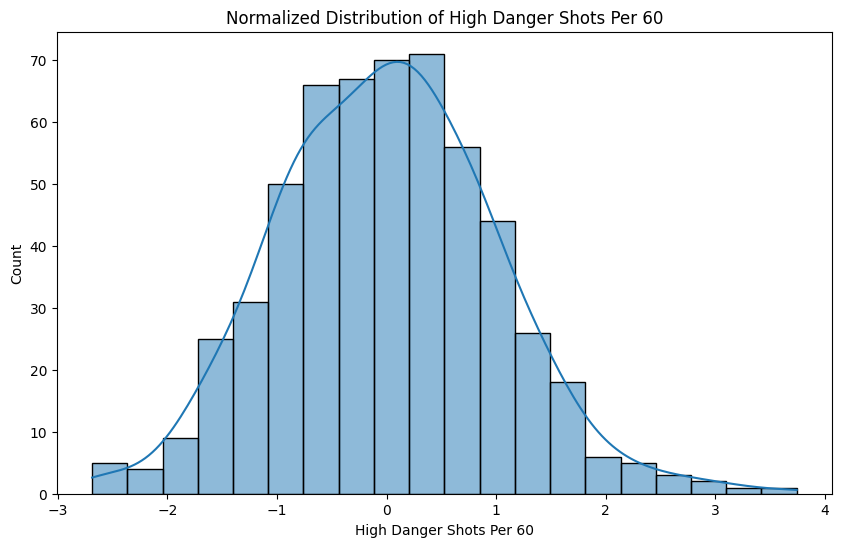

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(defense_normalized['OnIce_A_highDangerShots_per60'], bins=20, kde=True)
plt.title(f'Normalized Distribution of High Danger Shots Per 60')
plt.xlabel('High Danger Shots Per 60')
plt.show()

In [10]:
per60_df = defense_normalized[per60_stats]

per60_df.describe()


,OnIce_A_highDangerShots_per60,OnIce_A_mediumDangerShots_per60,OnIce_A_lowDangerShots_per60,OnIce_A_shotAttempts_per60,shotsBlockedByPlayer_per60,I_F_takeaways_per60,I_F_giveaways_per60,I_F_dZoneGiveaways_per60,I_F_dZoneShiftStarts_per60,I_F_dZoneShiftEnds_per60,I_F_oZoneShiftEnds_per60,I_F_neutralZoneShiftEnds_per60,I_F_flyShiftEnds_per60,penalties_per60,penaltiesDrawn_per60,icetime_per_game
count,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02,5.600000e+02
mean,-1.871519e-16,5.202188e-16,5.963484e-16,-1.122911e-15,-1.649474e-16,-1.173664e-16,-2.474211e-16,-4.472613e-16,-3.219647e-16,3.425831e-16,-4.821540e-16,-1.015061e-16,1.358437e-15,-3.489272e-17,1.205385e-16,6.978545e-17
std,9.991051e-01,9.991051e-01,9.991051e-01,9.991051e-01,9.991051e-01,9.991051e-01,9.991051e-01,9.991051e-01,9.991051e-01,9.991051e-01,9.991051e-01,9.991051e-01,9.991051e-01,9.991051e-01,9.991051e-01,9.991051e-01
min,-2.687816e+00,-2.668635e+00,-3.033788e+00,-3.046615e+00,-2.167089e+00,-2.255737e+00,-2.336807e+00,-2.624505e+00,-2.785129e+00,-2.850734e+00,-2.698309e+00,-3.282014e+00,-2.678271e+00,-1.702241e+00,-2.151523e+00,-2.902965e+00
25%,-6.947883e-01,-6.852118e-01,-6.871908e-01,-6.537320e-01,-7.168265e-01,-7.020389e-01,-7.273986e-01,-6.928125e-01,-6.018277e-01,-7.048456e-01,-6.451592e-01,-7.043824e-01,-6.867701e-01,-7.070728e-01,-7.048873e-01,-7.599645e-01
50%,-1.037711e-02,-7.539434e-03,7.647053e-03,-2.551437e-02,-6.326369e-02,-1.234383e-01,-3.107141e-03,-2.809440e-02,-6.925049e-02,2.578623e-02,3.835170e-02,8.386918e-04,-7.484519e-02,-1.946170e-01,-9.305307e-02,4.888170e-02
75%,6.706291e-01,6.180114e-01,6.046613e-01,7.045182e-01,5.889090e-01,6.210524e-01,6.316330e-01,6.516388e-01,5.267702e-01,6.612892e-01,7.017442e-01,6.527776e-01,6.423752e-01,4.451587e-01,5.574157e-01,7.360586e-01
max,3.744299e+00,3.772877e+00,4.038967e+00,3.969688e+00,4.371575e+00,3.501708e+00,3.405730e+00,4.421493e+00,4.322669e+00,2.840199e+00,2.574751e+00,3.228487e+00,3.746914e+00,4.415791e+00,4.170701e+00,3.302208e+00


In [11]:
# All stats needed for Defensive Rating calculation
defensive_weights = {
    # Ice time responsibility (higher is better - rewards players who play more)
    'icetime_per_game': 5,
    
    # Shot Suppression (Lower is better)
    'OnIce_A_highDangerShots_per60': -15,
    'OnIce_A_mediumDangerShots_per60': -10,
    'OnIce_A_lowDangerShots_per60': -1,
    'OnIce_A_shotAttempts_per60': -1,
    
    # Physical Defense (Higher is better)
    'shotsBlockedByPlayer_per60': 15,
    
    # Puck Management (Lower is better)
    'I_F_takeaways_per60': 5,
    'I_F_giveaways_per60': -5,
    'I_F_dZoneGiveaways_per60': -10,
    
    # Shift Quality (Higher is better, except defense ends)
    'I_F_dZoneShiftStarts_per60': 5,
    'I_F_dZoneShiftEnds_per60': -5,
    'I_F_oZoneShiftEnds_per60': 5,
    'I_F_neutralZoneShiftEnds_per60': 1,
    'I_F_flyShiftEnds_per60': 1,
    
    # Penalty Differential (Lower is better)
    'penalties_per60': -15,
    'penaltiesDrawn_per60': 1,
}

### Mathematical Formula

Defense Quality is calculated as a weighted composite z-score:

$$
DQ = \sum_{i=1}^{n} \frac{w_i}{\sum_{j=1}^{n}|w_j|} \cdot z_i
$$

Where:
- $DQ$ = Defense Quality score
- $n$ = 16 (total number of defensive statistics)
- $w_i$ = weight for statistic $i$ (can be positive or negative)
- $z_i$ = position-specific z-score for statistic $i$ (normalized per 60 minutes)
- $\sum_{j=1}^{n}|w_j|$ = sum of absolute values of all weights (normalization factor)

The z-scores are calculated separately by position (Forward vs Defenseman):

$$
z_i = \frac{x_i - \mu_{\text{position}}}{\sigma_{\text{position}}}
$$

Where $x_i$ is the per-60 rate statistic, $\mu_{\text{position}}$ is the position-specific mean, and $\sigma_{\text{position}}$ is the position-specific standard deviation.

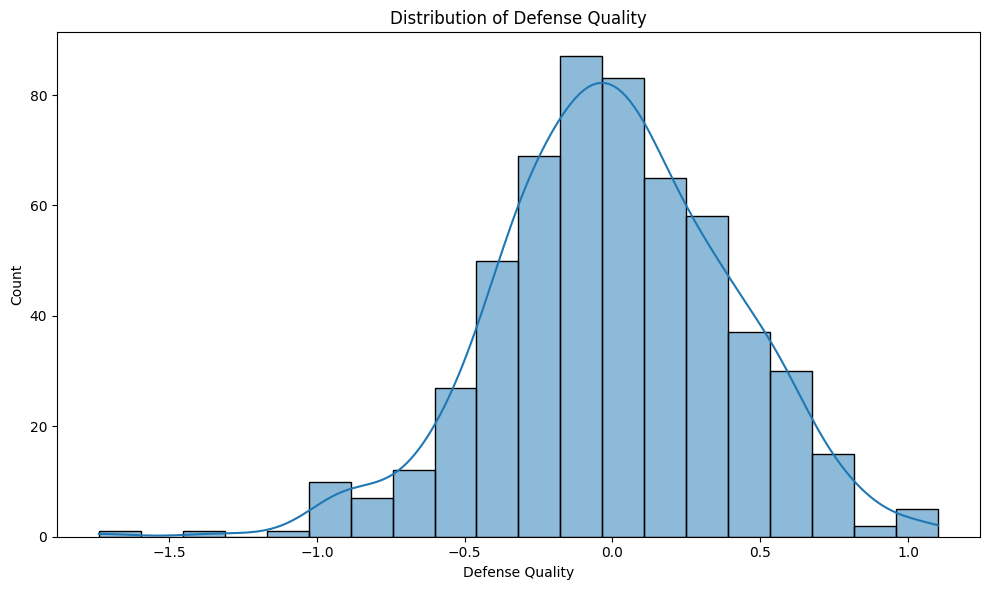

In [13]:
s = sum(np.abs(defensive_weights[stat]) for stat in defensive_weights.keys())
defense_quality = sum((defensive_weights[stat] / s) * per60_df[stat] for stat in defensive_weights.keys())

per60_df.loc[:, ['defense_quality']] = defense_quality

# Add raw ice time data for reference
per60_df.loc[:, ['icetime']] = defense_normalized['icetime']
per60_df.loc[:, ['games_played']] = defense_normalized['games_played']
per60_df.loc[:, ['icetime_per_game']] = defense_normalized['icetime_per_game']

plt.figure(figsize=(10, 6))

sns.histplot(per60_df['defense_quality'], bins=20, kde=True)
plt.title('Distribution of Defense Quality')
plt.xlabel('Defense Quality')

plt.tight_layout()
plt.show()

## Results and Interpretation

We finally have our new statistic! Whew, this was an intense one but we're finally at the fun part! If we look at the distribution of forwards and defensemen, we can see they're both mostly normal with a very slight skew left. This is to be expected, most players are average defensively, some great, some awful. On a macro level, it looks good! Let's dive deep to see if it's accurate.

In [14]:
defense_dq = per60_df[per60_df['position'] == 'D']
forward_dq = per60_df[per60_df['position'] == 'F']

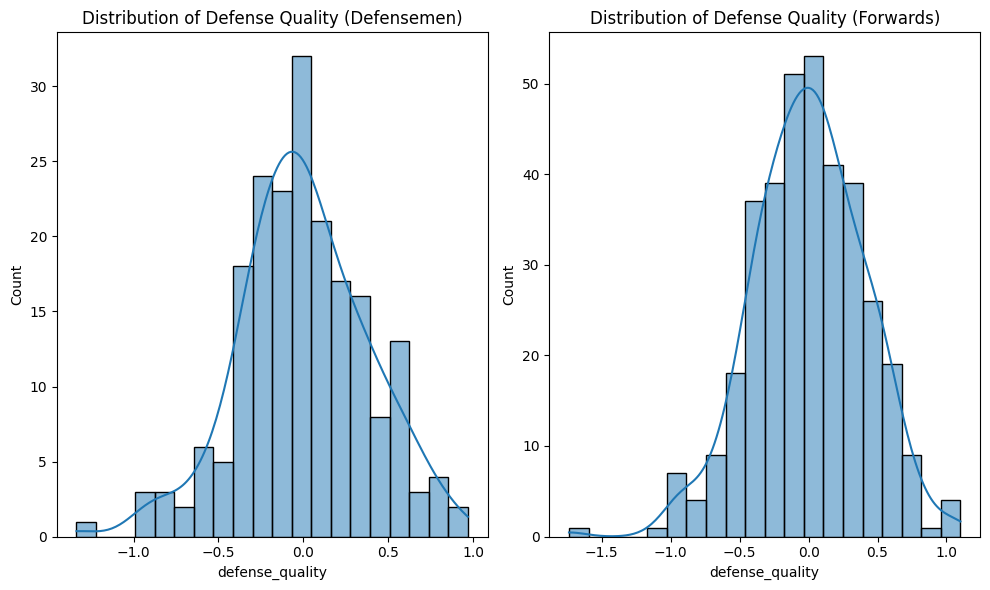

In [15]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(defense_dq['defense_quality'], bins=20, kde=True)
plt.title('Distribution of Defense Quality (Defensemen)')

plt.subplot(1, 2, 2)
sns.histplot(forward_dq['defense_quality'], bins=20, kde=True)
plt.title('Distribution of Defense Quality (Forwards)')

plt.tight_layout()
plt.show()


The defensive top 10 looks very accurate. Spurgeon is an absolute lock down defenseman, and right behind him is the LA King's top pairing. The only surprise to me in the top 10 is Rasmus Ristolainen. He's had an up and down career, but looking at the numbers, he had a great year last season (especially compared to the rest of his career) that was unfortunately derailed by injuries.

In [16]:
display_stats = ['name', 'team', 'position', 'defense_quality']
d_top_10 = defense_dq[display_stats].sort_values(by='defense_quality', ascending=False).head(10).reset_index(drop=True)
d_top_10.index += 1

d_top_10.round(3)

,name,team,position,defense_quality
1,Jared Spurgeon,MIN,D,0.970
2,Vladislav Gavrikov,LAK,D,0.865
3,Mikey Anderson,LAK,D,0.812
4,Chris Tanev,TOR,D,0.800
5,Artem Zub,OTT,D,0.797
6,Rasmus Ristolainen,PHI,D,0.744
7,Colton Parayko,STL,D,0.714
8,Jaccob Slavin,CAR,D,0.687
9,Jake Sanderson,OTT,D,0.655
10,Adam Pelech,NYI,D,0.620


Remember how I said the weights might need to be adjusted for forwards? While the defensive metric is great for defensemen, it fails to accurately assess defense for forwards in my opinion. The list is mainly third line players, generally whose role is to be good defensively and shut down an opposing team's top line. This makes sense why players such as Logan O'Connor are at the top. In that sense, it's good even if I don't agree with the top ranking. However, I can't help but feel like Sam Reinhart (12) should not be above Aleksander Barkov (16). There's other questionable rankings in here, but overall I think it's a solid foundation that can (and should) be built upon for forwards.

In [17]:
f_top_10 = forward_dq[display_stats].sort_values(by='defense_quality', ascending=False).head(10).reset_index(drop=True)
f_top_10.index += 1

f_top_10.round(3)

,name,team,position,defense_quality
1,Logan O'Connor,COL,F,1.101
2,Noel Acciari,PIT,F,1.063
3,Elias Pettersson,VAN,F,1.018
4,Colton Sissons,NSH,F,0.972
5,Parker Kelly,COL,F,0.841
6,Joel Kiviranta,COL,F,0.802
7,Anthony Cirelli,TBL,F,0.793
8,Adam Lowry,WPG,F,0.787
9,Ryan Poehling,PHI,F,0.779
10,Alexander Wennberg,SJS,F,0.734


The biggest issue with this raw Defense Quality stat, is it's interpretability. Defense Rating is in goals, WAR is in wins, but Defense Quality is in standard deviations of the mean. That's neither sexy, nor is it meaningful without knowing the data. Baseball has had a solution for this forever, the plus statistic! We can transform Defense Quality as is, to Defense Quality Plus, so that it is now measured in "percent of the average." The numbers are nearly identical since our average was at 0, and we're just shifting it to 100. This means "Spurgeon has 97% better defense than the average player," or "Spurgeon gives up 97% less quality offense for the opposing team than average." This plus version is what I propose to be the default way of showing Defense Quality, much like how the default way of showing PDO is the transformed statistic, rather than raw sum percentage.

In [18]:
dq_plus = 100 + defense_dq['defense_quality'] * 100
defense_dq.loc[:, ['dq_plus']] = dq_plus / np.mean(dq_plus) * 100

dq_plus = 100 + forward_dq['defense_quality'] * 100
forward_dq.loc[:, ['dq_plus']] = dq_plus / np.mean(dq_plus) * 100

top10_d = defense_dq[display_stats + ['dq_plus']].sort_values(by='dq_plus', ascending=False).head(10).reset_index(drop=True)
top10_d.index += 1

top10_d.round(3)


,name,team,position,defense_quality,dq_plus
1,Jared Spurgeon,MIN,D,0.970,197.041
2,Vladislav Gavrikov,LAK,D,0.865,186.464
3,Mikey Anderson,LAK,D,0.812,181.166
4,Chris Tanev,TOR,D,0.800,180.031
5,Artem Zub,OTT,D,0.797,179.718
6,Rasmus Ristolainen,PHI,D,0.744,174.398
7,Colton Parayko,STL,D,0.714,171.409
8,Jaccob Slavin,CAR,D,0.687,168.713
9,Jake Sanderson,OTT,D,0.655,165.462
10,Adam Pelech,NYI,D,0.620,161.999


The final Defense Quality Plus (DQ+) metric transforms DQ to a percentage scale:

$$
DQ+ = \frac{100 + (DQ \times 100)}{\overline{DQ+}} \times 100
$$

Where $\overline{DQ+}$ is the mean of the transformed scores, centering the league average at 100.

When we graph DQ+ we can easily highlight elite vs above average defense. Since this is a normal distribution, we can focus on the standard deviations. Anything 2 standard deviations (around 76%) is considered elite. This limits us to only the top 5 as well in this case. Also, anything below 62% can be considered poor defense that needs improvement.

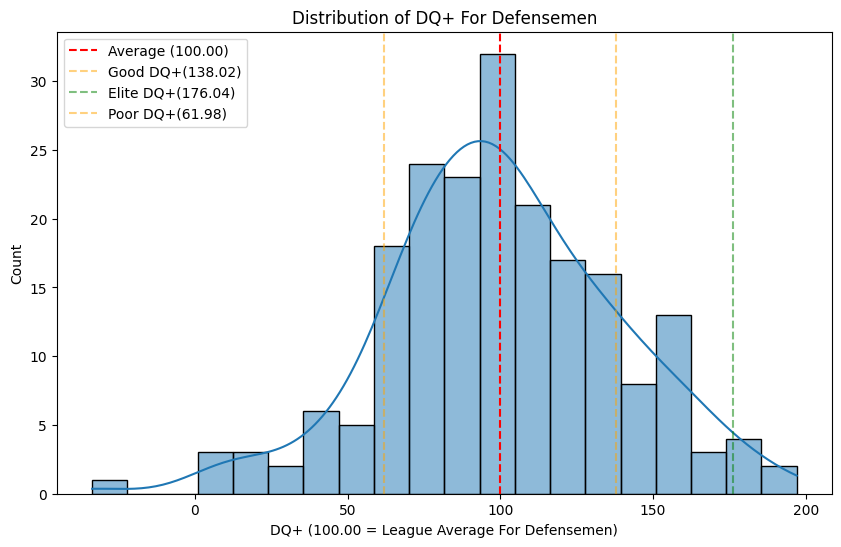

In [21]:
# Visualize the DR+ distribution
std = defense_dq['dq_plus'].std()
mean = defense_dq['dq_plus'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(defense_dq['dq_plus'], bins=20, kde=True)
plt.axvline(mean, color='red', linestyle='--', label=f'Average ({mean:.2f})')
plt.axvline(mean + std, color='orange', linestyle='--', alpha=0.5, label=f'Good DQ+({mean + std:.2f})')
plt.axvline(mean + 2 * std, color='green', linestyle='--', alpha=0.5, label=f'Elite DQ+({mean + 2 * std:.2f})')
plt.axvline(mean - std, color='orange', linestyle='--', alpha=0.5, label=f'Poor DQ+({mean - std:.2f})')
plt.title('Distribution of DQ+ For Defensemen')
plt.xlabel(f'DQ+ ({mean:.2f} = League Average For Defensemen)')
plt.legend()
plt.show()

Although not the intention of the metric, it can be used to measure a team's defense pretty well. If we take the average of a team's players' DQ+, we get a pretty good understanding on a team's overall defense that does tend to line up well. It's not perfect because the forward DQ+ isn't, but it's not a bad list. Again, this isn't the intention of the stat, it just lines up well and shows more ways it can be used.

In [20]:
team_dq = pd.concat([defense_dq, forward_dq])
team_dq = team_dq.groupby('team')['dq_plus'].mean().sort_values(ascending=False).reset_index()
top10_team_dq = team_dq.head(10)

top10_team_dq.round(3)

,team,dq_plus
0,PHI,128.909
1,LAK,128.790
2,WPG,123.566
3,COL,120.687
4,STL,120.397
5,VAN,120.346
6,MIN,115.182
7,EDM,115.108
8,CGY,112.099
9,VGK,110.477


Overall, Defense Quality provides an excellent way to compare defensemen, and understand their defensive impact on the quality of offense an opposing team gets while they're on the ice. It is a very good stat to pair with Defensive Rating, so that one can understand that results of a player's defense, and the reasons behind it. Since Defense Quality directly compares players in the same position, it is able to be quickly understood as to what is "good" vs "bad" Defense Quality without needing a deep understanding of the statistic.

# Thanks For Reading!
If you made it this far, thanks! I want to keep this blog pretty light hearted and fun, more like my first two, but I thought it would be interesting to go deep into trying to fill a hole that exists. [I've also started an X account in case anyone is interested](https://x.com/HockeyxHarmony), but I'm not sure how much I'll be using it. Would love to hear your thoughts on where else this stat can be useful! Also, let me know if you more preferred the previous ones aimed at being more fun, or this one that aimed at providing a real solution.